# Training a Simple Traffic Sign Classifier 

__Objective__: Create a CNN (Convolutional Neural Network) model. Use this model to classify traffic signs.

__Workflow__:
1. Using `numpy` to load your dataset for training.
    - use `numpy.load` method to load data and labels matrices 
2.  Create a CNN with these specifications:
    - Input Dimensions of 134 x 128 x 3 
    - Two Convolution Layers (Kernel Size 5x5). The first with 64 filters, the second with 32. Use `ReLU` as the activation layer.
    - Max Pooling of size 5 x 5
    - Add a Dense Layer comprising of 64 outputs
    - Dropout Rate of 0.2
    - Add the final Dropout Layer that indicates the class probabilities
3.  Train this CNN on the `Traffic Sign` dataset your prepared in Step 2
    - Train for at least 30 Epochs 
4.  Plot graphs showing how your training and validation loss and accuracy changed with respect to the Epochs completed. 
5.  Save your model, you will be using it in the second milestone.
6.  Test your model on some random samples from the test dataset.

__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take the `Traffic Sign` dataset, view samples, convert it into the proper shape/format as required by your deep learning library. You are required to train the model using the specifications provided. You should save your model as you'll need it for further analysis in the second milestone.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

from plot_keras_history import plot_history
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

import pandas as pd
from glob import glob
from tqdm import tqdm
import cv2
from keras.preprocessing.image import  img_to_array
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.patches as patches

In [5]:
EPOCHS = 30
BS = 100
MODEL_NAME = 'cnn-traffic-sign.h5'

In [8]:
dataset = np.load('traffic_sign.npz')
data = dataset['data']
labels = dataset['labels']

(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [9]:
def get_model(input_shape, num_of_class):
    model = Sequential()
    model.add(Conv2D(32, (5, 5),activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(5, 5)))
    
    model.add(Conv2D(32, (5, 5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5)))
    
    model.add(Flatten())  
    model.add(Dense(64, activation='relu',))
    model.add(Dropout(0.2))
    model.add(Dense(num_of_class, activation='softmax'))
     
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [10]:
model = get_model(data[0,:].shape, labels.shape[1])

trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

checkpoint = ModelCheckpoint(MODEL_NAME, verbose=1, monitor='accuracy',
                             save_best_only=True, mode='auto') 

#model.load_weights(MODEL_NAME)

history = model.fit(trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(data) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
      callbacks=[checkpoint],
    epochs=EPOCHS)

Epoch 1/30
41/41 [==============================] - 33s 568ms/step - loss: 3.6916 - accuracy: 0.1261 - val_loss: 2.8880 - val_accuracy: 0.3082

Epoch 00001: accuracy improved from -inf to 0.17418, saving model to cnn-traffic-sign.h5
Epoch 2/30
41/41 [==============================] - 22s 530ms/step - loss: 2.9134 - accuracy: 0.2654 - val_loss: 2.3232 - val_accuracy: 0.4029

Epoch 00002: accuracy improved from 0.17418 to 0.29906, saving model to cnn-traffic-sign.h5
Epoch 3/30
41/41 [==============================] - 21s 524ms/step - loss: 2.2980 - accuracy: 0.3980 - val_loss: 1.7739 - val_accuracy: 0.5276

Epoch 00003: accuracy improved from 0.29906 to 0.42716, saving model to cnn-traffic-sign.h5
Epoch 4/30
41/41 [==============================] - 25s 613ms/step - loss: 1.8105 - accuracy: 0.5321 - val_loss: 1.2920 - val_accuracy: 0.6751

Epoch 00004: accuracy improved from 0.42716 to 0.54807, saving model to cnn-traffic-sign.h5
Epoch 5/30
41/41 [==============================] - 28s 699

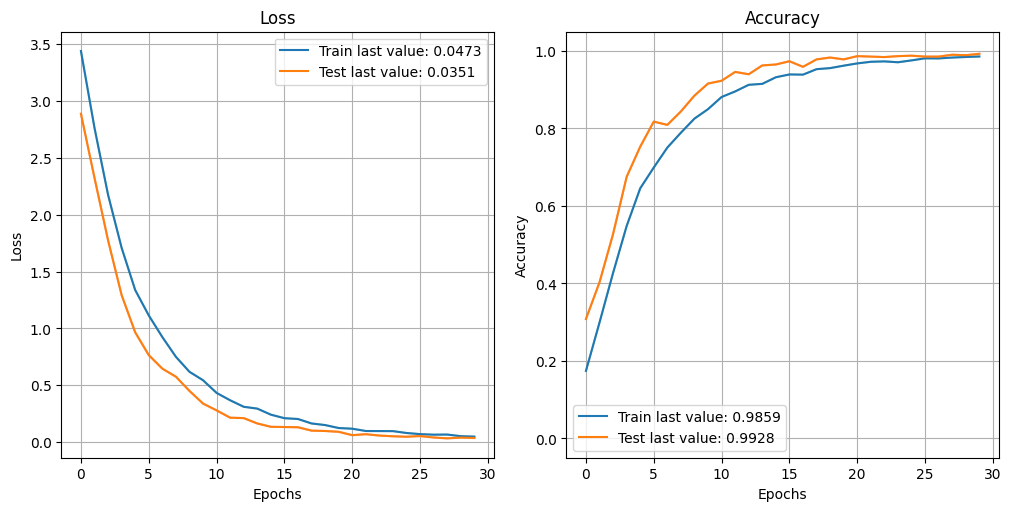

In [11]:
plot_history(history.history)
plt.show()

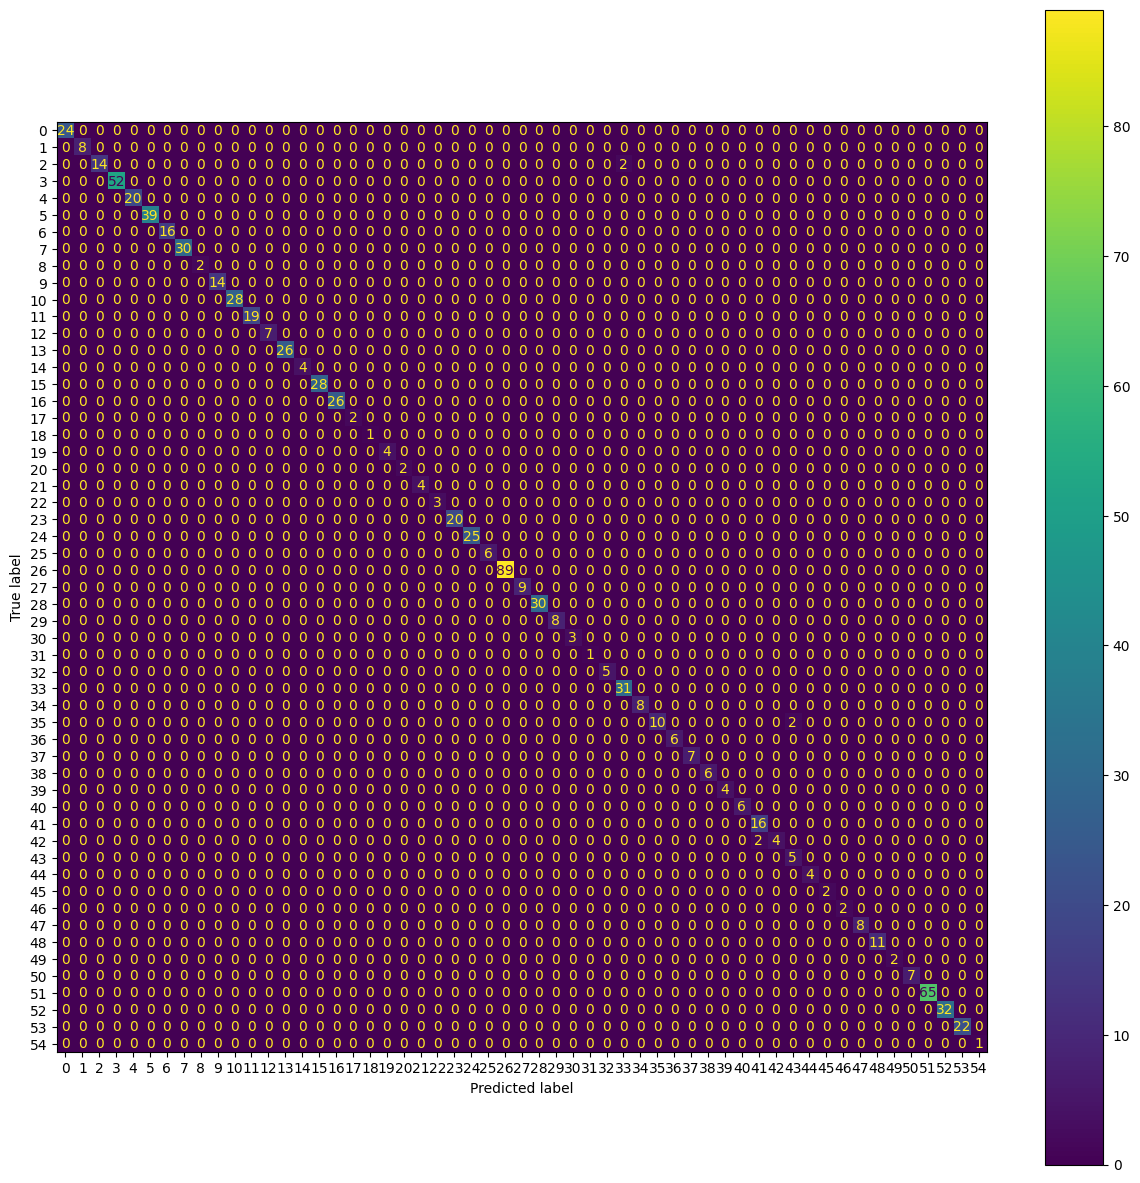

In [12]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
fig, ax = plt.subplots(figsize=(15,15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [13]:
cr = classification_report(testY.argmax(axis=1), predIdxs)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         8
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00         2
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00        28
          17       1.00      1.00      1.00        26
          18       1.00    